# Advanced Regression Assignment

### Data understanding and exploration

In [162]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [85]:
#Reading the data
df = pd.read_csv('D:/My Documents/UPGRAD Masters AI ML/Modules/ML2/Module 1/Assignment/train.csv')

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [88]:
df.shape

(1460, 81)

In [89]:
#Getting few more insights from the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [90]:
df.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [91]:
#see all rows
pd.set_option("max_rows", None)

In [92]:
df.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


# Data cleanup step

In [93]:
#Take a look at missing percentage in each column
round(df.isnull().sum()/len(df.index) * 100, 2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [94]:
# Considering 80% as the cut-off for our analysis, we will drop all the columns that have a missing percentage of above 80 -
# PoolQC, MiscFeature, Alley, Fence              
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [95]:
#Imputing the other columns - FireplaceQu, LotFrontage, with missing values with some relevant values
df['FireplaceQu'].value_counts()


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [96]:
#Replacing NA values in FireplaceQU with 'No Fireplace'
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [97]:
df['FireplaceQu'].value_counts()


No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [98]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [99]:
#Replacing NA values in LotFrontage with 0
df['LotFrontage'].fillna(0, inplace=True)

In [100]:
df['LotFrontage'].isnull().sum()

0

In [101]:
#Imputing the NAs for the Garage Related columns - GarageType, GarageFinish, GarageQual, GarageCond, No Garage
df['GarageType'].fillna('No Garage', inplace=True) 
df['GarageFinish'].fillna('No Garage', inplace=True) 
df['GarageQual'].fillna('No Garage', inplace=True) 
df['GarageCond'].fillna('No Garage', inplace=True)

In [102]:
#Take a look at missing percentage in each column
round(df.isnull().sum()/len(df.index) * 100, 2).sort_values(ascending=False)

GarageYrBlt      5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
SalePrice        0.00
Exterior2nd      0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
ExterCond        0.00
ExterQual        0.00
YearBuilt        0.00
Foundation       0.00
BsmtFinSF1       0.00
YearRemodAdd     0.00
OverallCond      0.00
BsmtUnfSF        0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
BsmtFinSF2       0.00
Heating          0.00
TotalBsmtSF      0.00
GarageType       0.00
GarageCars       0.00
GarageArea       0.00
GarageQual       0.00
GarageCond

In [103]:
#Imputing the Masonary Vaneer related columns - MasVnrArea, MasVnrType
df['MasVnrType'].value_counts()


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [104]:
df['MasVnrType'].isnull().sum()

8

In [105]:
df['MasVnrType'].fillna('None', inplace=True)

In [106]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [107]:
df['MasVnrArea'].fillna(0, inplace=True)

In [108]:
#Analysing the basement related attributes-BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 -
#in order to have a better understanding of what to impute them with 
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [109]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [110]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [111]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [112]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [113]:
# As these are all categorical columns, we will impute with the corresponding Mode values
df['BsmtQual'].fillna('TA', inplace=True)
df['BsmtCond'].fillna('TA', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1']fillna('Unf', inplace=True)
df['BsmtFinType2'].fillna('Unf', inplace=True)

In [114]:
#Take a look at missing percentage in each column
round(df.isnull().sum()/len(df.index) * 100, 2).sort_values(ascending=False)

GarageYrBlt      5.55
Electrical       0.07
SalePrice        0.00
ExterQual        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterCond        0.00
YearBuilt        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
YearRemodAdd     0.00
OverallCond      0.00
BsmtUnfSF        0.00
OverallQual      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
BsmtFinSF2       0.00
Heating          0.00
TotalBsmtSF      0.00
GarageType       0.00
GarageCars       0.00
GarageArea       0.00
GarageQual       0.00
GarageCond

In [115]:
df.YearBuilt.max()

2010

In [116]:
#Let us now take a look at the year related attributes- YearBuilt, YearRemodAdd, GarageYrBlt, YrSold
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [117]:
#Converting the Years column to Age in current Year
df['YearBuilt'] = 2020 - df['YearBuilt']
df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']
df['YrSold'] = 2020 - df['YrSold']

In [118]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,17,17,17.0,12
1,44,44,44.0,13
2,19,18,19.0,12
3,105,50,22.0,14
4,20,20,20.0,12


In [119]:
#Imputing GarageYrBlt with -1, as it means those houses don't have any garage
df['GarageYrBlt'].fillna(-1, inplace=True)

In [120]:
#Lets tale a look at the Electrical column
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [121]:
#Imputing it with the mode value
df['Electrical'].fillna('SBrkr', inplace=True)

In [122]:
# Dropping additional columns
# id column is a unique key and hence can be dropped
df = df.drop('Id', axis=1)

We have nearly completed the process of cleaning our data, and we have taken care of all missing values. Now let us look for correlation between the columns in order to drop few more


In [123]:
corr = df.corr()
print(corr)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.215023 -0.139781     0.032628    -0.059316   
LotFrontage     -0.215023     1.000000  0.100739     0.176561    -0.053457   
LotArea         -0.139781     0.100739  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.176561  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053457 -0.005636    -0.091932     1.000000   
YearBuilt       -0.027850    -0.036853 -0.014228    -0.572323     0.375983   
YearRemodAdd    -0.040581    -0.078686 -0.013788    -0.550684    -0.073741   
MasVnrArea       0.023573     0.105010  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.076670  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649    -0.009312  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.160829 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.238274  0.260833     0.537808   

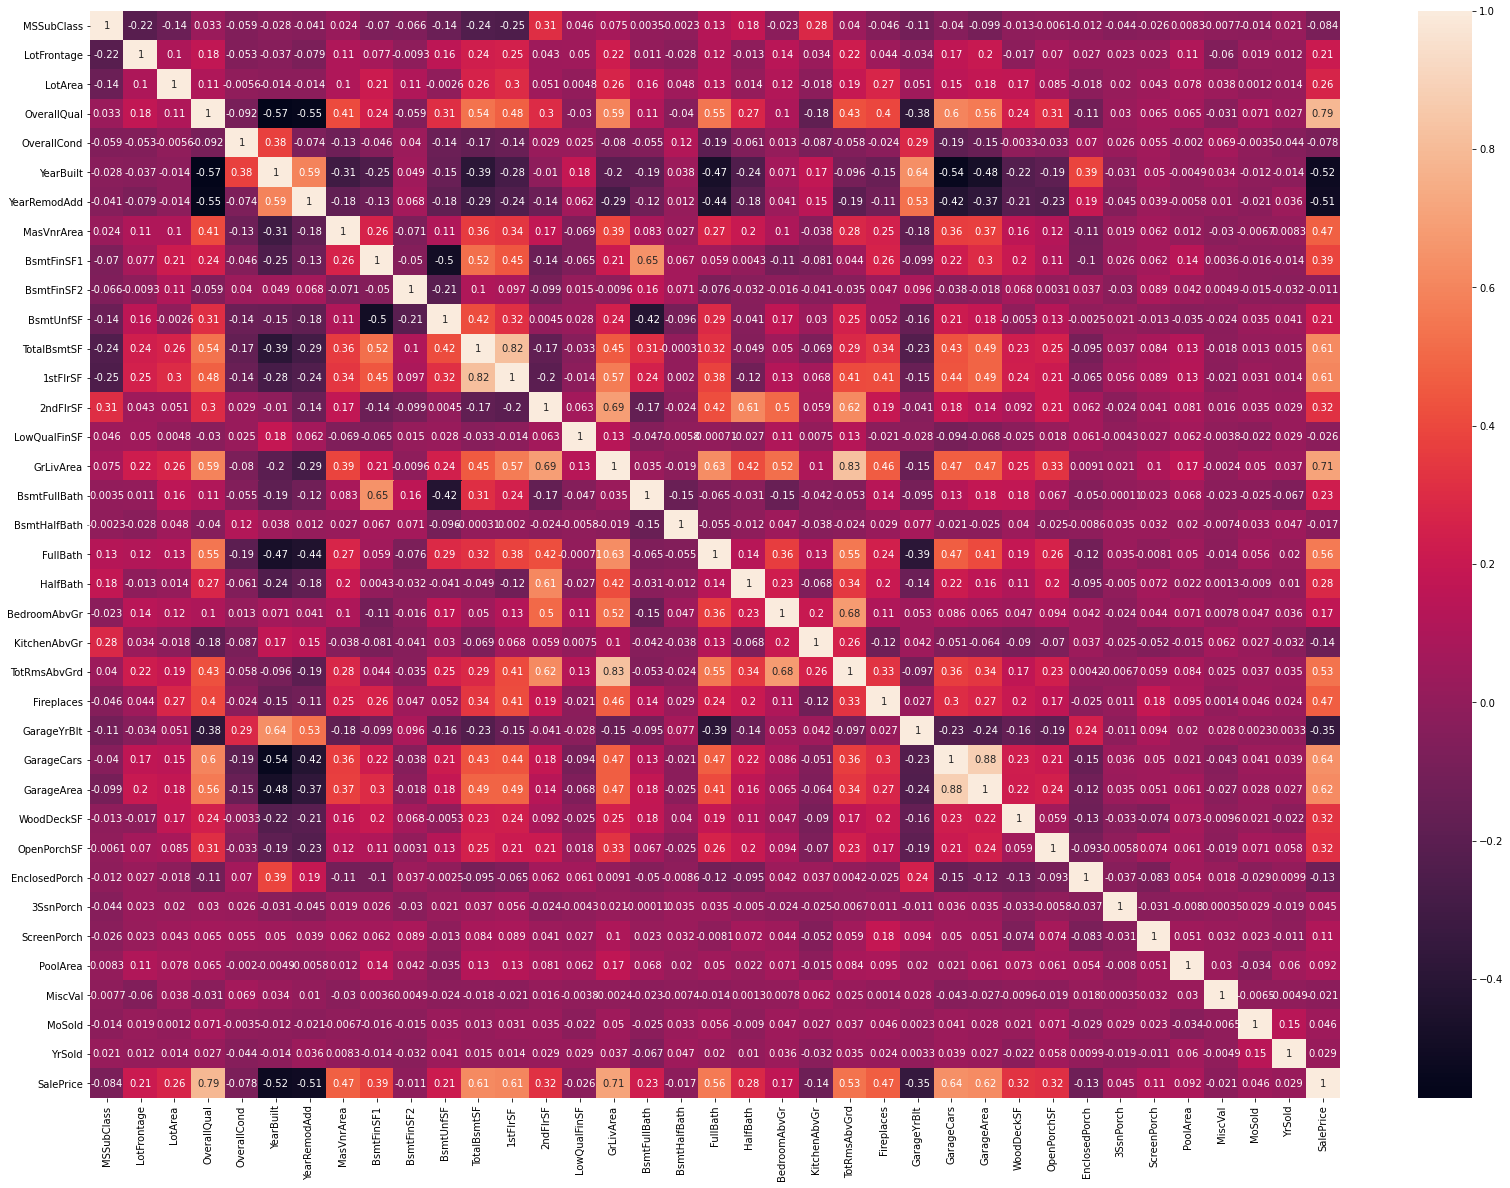

In [127]:
# PLotting a heat map to better understand the correlation numbers
plt.figure(figsize=(28,20))

# heatmap
sns.heatmap(corr, annot=True)
plt.show()

In [132]:
#Droppnig some highly correlated columns 
#From above we can see clearly that the columns YearBuilt and GarageYrBlt are highly correlated. So we can drop one of them
df = df.drop('GarageYrBlt', axis=1)

In [133]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [134]:
df.shape

(1460, 75)

### Data Cleaning

In [135]:
#Converting some of the columns that have been marked as Integer to Object types, as they are more like categorical values
# MSSubClass, OverallQual, OverallCond

df[['MSSubClass', 'OverallQual', 'OverallCond' ]].head()


,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5
3,70,7,5
4,60,8,5


In [136]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [141]:
df.shape

(1460, 75)

In [139]:
# Outlier Treatment
#We will now look for outliers in the integer type columns and remove them from our dataset
list(df.dtypes[df.dtypes !='object'].index)

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [140]:
df[list(df.dtypes[df.dtypes !='object'].index)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,57.623288,34.664304,0.0,42.00,63.0,79.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,48.732192,30.202904,10.0,20.00,47.0,66.00,148.0
YearRemodAdd,1460.0,35.134247,20.645407,10.0,16.00,26.0,53.00,70.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


In [142]:
#From above list we can clearly see columns such as - LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF
# GrLivArea, MiscVal, have clear outliers. We will try to remove them using below function

outlier_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'MiscVal']

def removeOutliers(x):    
    for col in outlier_cols:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = removeOutliers(df)

In [143]:
df.shape

(1447, 75)

In [144]:
df[list(df.dtypes[df.dtypes !='object'].index)].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1447.0,57.578438,33.866213,0.0,43.0,63.0,79.0,313.0
LotArea,1447.0,10048.089841,5475.696214,1300.0,7517.5,9453.0,11519.0,70761.0
YearBuilt,1447.0,48.682101,30.267363,10.0,19.5,47.0,66.0,148.0
YearRemodAdd,1447.0,35.175536,20.654796,10.0,16.0,26.0,53.0,70.0
MasVnrArea,1447.0,102.417415,179.816754,0.0,0.0,0.0,163.5,1600.0
BsmtFinSF1,1447.0,437.871458,434.546284,0.0,0.0,380.0,707.0,2260.0
BsmtFinSF2,1447.0,45.704907,160.218732,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1447.0,568.870767,442.736610,0.0,224.5,481.0,810.5,2336.0
TotalBsmtSF,1447.0,1052.447132,417.147466,0.0,795.0,990.0,1289.5,3206.0
1stFlrSF,1447.0,1158.889426,374.545119,334.0,882.0,1086.0,1386.0,3228.0


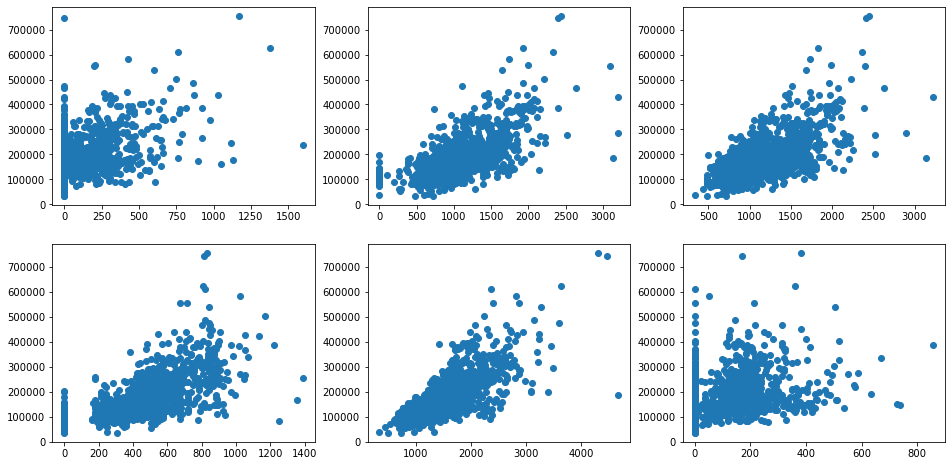

In [146]:
#Data Exploration
# Now let us do some data exploration

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df['MasVnrArea'],df['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df['TotalBsmtSF'],df['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df['1stFlrSF'],df['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df['WoodDeckSF'],df['SalePrice'])

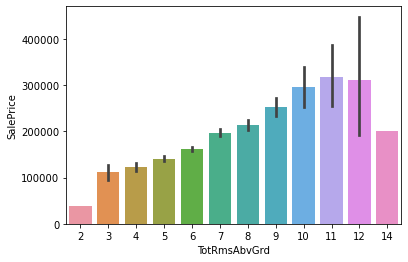

In [147]:
#Analysing some of the other attributes like - TotRmsAbvGrd, YearBuilt(which is the Age of house)
sns.barplot(x= 'TotRmsAbvGrd', y = 'SalePrice', data = df, estimator = np.mean)

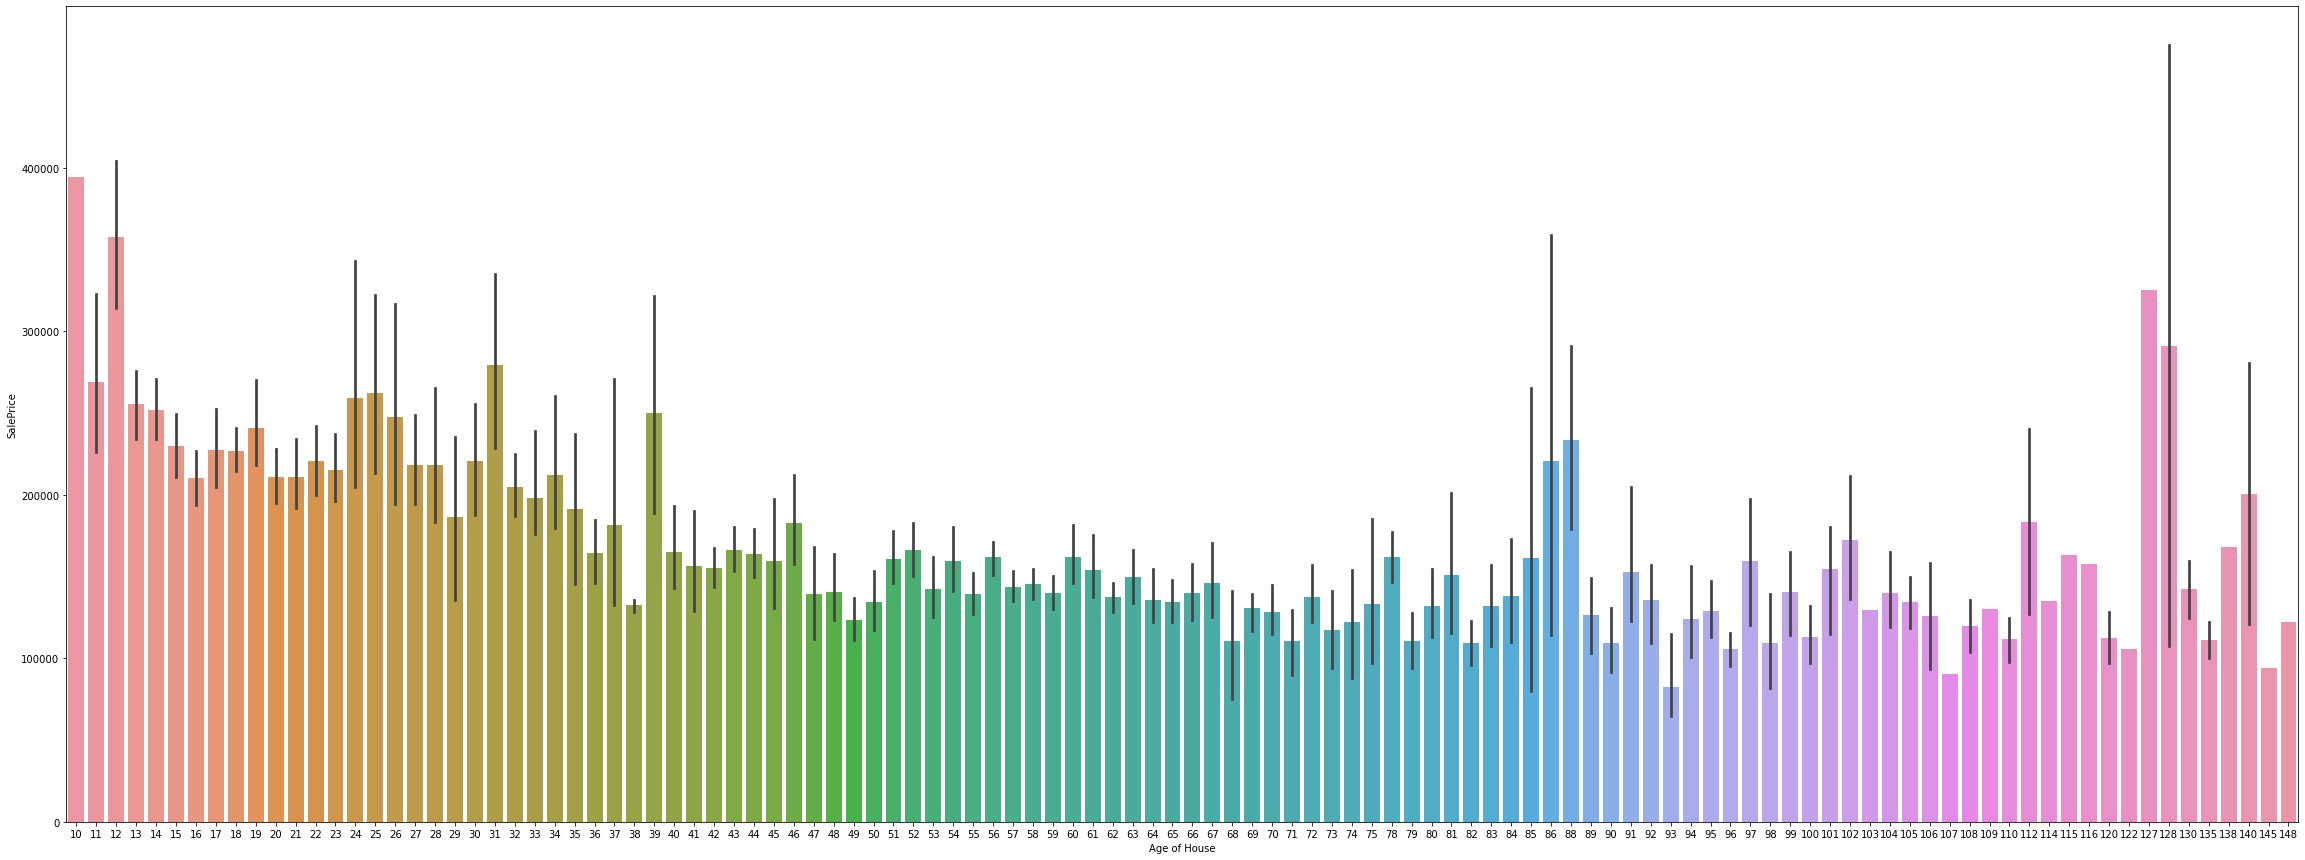

In [151]:
plt.figure(figsize=(40,15))
sns.barplot(x= 'YearBuilt', y = 'SalePrice', data = df, estimator = np.mean)
plt.xlabel('Age of House')
plt.show()

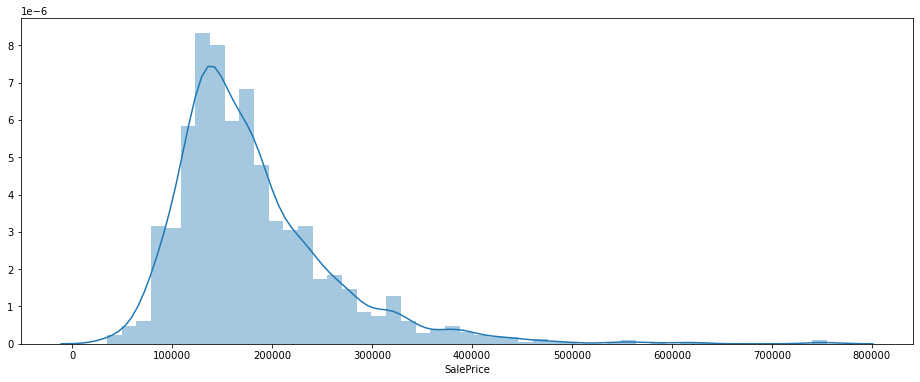

In [160]:
#Observing the distribution of the SalesPrice column
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

In [152]:
## Data Preparation
# Identifying categorical columns and storing it into a new dataframe

df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [154]:
# Creating dummy variables
df_dummy = pd.get_dummies(df_categorical, drop_first=True)
df_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [155]:
#Create a final dataframe without the original categorical columns
df_final = df.drop(list(df_categorical.columns), axis=1)

In [158]:
#Add the dummy dataframe to the final dataframe
df_final = pd.concat([df_final, df_dummy], axis=1)

In [159]:
df_final.shape

(1447, 267)

### Model Building

In [163]:
# Creating Train and Test Split
df_train, df_test = train_test_split(df_final, train_size=0.7, test_size=0.3, random_state=50)

In [169]:
# Splitting the data on the basis of dependant and independant variables
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [170]:
# Let us now use RFE to find the optimal features
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 100) #with 100 features
rfe.fit(X_train,y_train)

C:\Users\parth\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=100 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=100)

In [171]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 163),
 ('LotArea', False, 121),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 159),
 ('MasVnrArea', False, 106),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 151),
 ('BsmtHalfBath', False, 160),
 ('FullBath', False, 132),
 ('HalfBath', False, 137),
 ('BedroomAbvGr', False, 131),
 ('KitchenAbvGr', False, 98),
 ('TotRmsAbvGrd', False, 110),
 ('Fireplaces', False, 94),
 ('GarageCars', False, 153),
 ('GarageArea', False, 54),
 ('WoodDeckSF', False, 127),
 ('OpenPorchSF', False, 145),
 ('EnclosedPorch', False, 116),
 ('3SsnPorch', False, 154),
 ('ScreenPorch', False, 117),
 ('PoolArea', False, 149),
 ('MiscVal', False, 157),
 ('MoSold', False, 135),
 ('YrSold', False, 164),
 ('MSSubClass_30', False, 87),
 ('MSSubClass_40', False, 105),
 ('MSSubClass_45', True, 1),
 ('MSSubClass_50'

In [172]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [173]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [174]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [185]:
#Applying K-Fold Cross validation and building a Lasso Regression model
folds = KFold(n_splits=10, shuffle=True, random_state=50)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0, 20.0]}

model = Lasso()

model_cv_lasso = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv_lasso.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=50, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [187]:
cv_result_lasso = pd.DataFrame(model_cv_lasso.cv_results_)
cv_result_lasso.transpose()

,0,1,2,3,4,5,6
mean_fit_time,0.0374993,0.00877674,0.00438828,0.00448868,0.00329113,0.00398974,0.00349071
std_fit_time,0.00679637,0.000598538,0.000661092,0.000919625,0.000457059,0.000630789,0.00066919
mean_score_time,0.00269308,0.00269227,0.00229337,0.00259237,0.00229375,0.00229321,0.00229363
std_score_time,0.000457153,0.000458239,0.000457044,0.00101707,0.000457002,0.000639127,0.000456976
param_alpha,0.001,0.01,0.1,1,5,10,20
params,{'alpha': 0.001},{'alpha': 0.01},{'alpha': 0.1},{'alpha': 1.0},{'alpha': 5.0},{'alpha': 10.0},{'alpha': 20.0}
split0_test_score,0.896265,0.853397,0.752,-0.00130588,-0.00130588,-0.00130588,-0.00130588
split1_test_score,0.771837,0.800255,0.685501,-0.00844896,-0.00844896,-0.00844896,-0.00844896
split2_test_score,0.88339,0.852437,0.776767,-0.00821636,-0.00821636,-0.00821636,-0.00821636
split3_test_score,0.888298,0.883989,0.771131,-0.000783573,-0.000783573,-0.000783573,-0.000783573


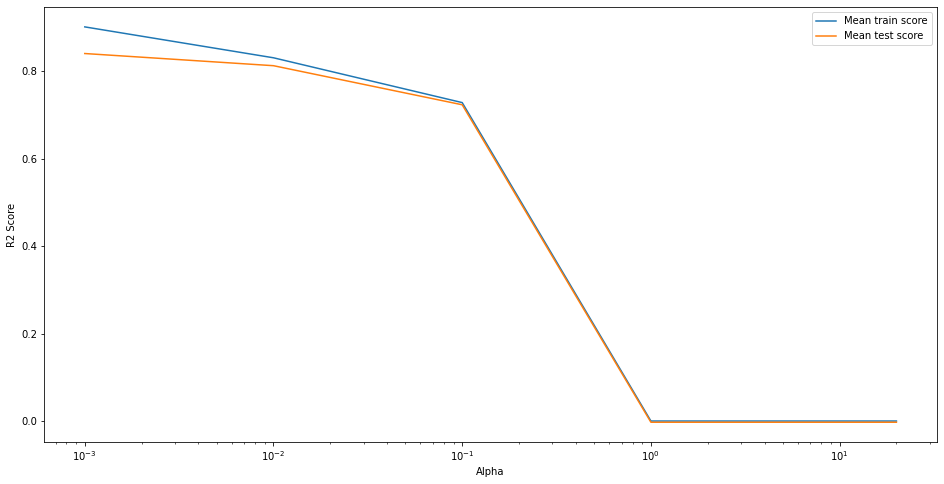

In [189]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['Mean train score', 'Mean test score'], loc='upper right')
plt.show()

In [191]:
# The best value of the hyperparameter for the above model
model_cv_lasso.best_params_

{'alpha': 0.001}

In [193]:
#Building a Lasso Regression Model with alpha = 0.001

lm_lasso = Lasso(alpha=0.001)
lm_lasso.fit(X_train,y_train)

y_train_pred = lm_lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred  = lm_lasso.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8987864128567928
0.9020563081888531


In [215]:
model_param = list(lm_lasso.coef_)
cols = df_train.columns
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coefficient Value']

In [221]:
lasso_coef.sort_values(by='Coefficient Value',ascending=False).head(20)

,Feature,Coefficient Value
47,MSZoning_RH,1.221773
46,MSZoning_FV,1.090765
65,Neighborhood_BrDale,0.795301
55,LandContour_Low,0.461050
8,TotalBsmtSF,0.415137
45,MSSubClass_190,0.339658
98,Condition2_PosA,0.269492
32,MSSubClass_30,0.237639
74,Neighborhood_Mitchel,0.231231
54,LandContour_HLS,0.219903


In [205]:
#Now let us try to build the same model using Ridge Regression
folds  = KFold(n_splits=10, shuffle=True, random_state=60)

hyper_param = {'alpha':[0.001, 0.01, 0.5, 1.0, 5.0, 10.0, 20.0]}

model = Ridge()

model_cv_ridge = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv_ridge.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=60, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [206]:
cv_result_ridge = pd.DataFrame(model_cv_ridge.cv_results_)
cv_result_ridge.transpose()

,0,1,2,3,4,5,6
mean_fit_time,0.00548649,0.00379252,0.00419347,0.00388722,0.00369046,0.00339119,0.00379109
std_fit_time,0.00102253,0.000599485,0.0010742,0.000298725,0.000457564,0.000661466,0.000399713
mean_score_time,0.00339262,0.00199163,0.00289142,0.00199299,0.00229321,0.00209401,0.0019932
std_score_time,0.00111231,5.11045e-06,0.00104172,2.45652e-06,0.000457309,0.000299542,1.88773e-06
param_alpha,0.001,0.01,0.5,1,5,10,20
params,{'alpha': 0.001},{'alpha': 0.01},{'alpha': 0.5},{'alpha': 1.0},{'alpha': 5.0},{'alpha': 10.0},{'alpha': 20.0}
split0_test_score,0.465086,0.464955,0.44873,0.436209,0.413005,0.408778,0.405111
split1_test_score,0.943026,0.943093,0.943006,0.941433,0.931389,0.92291,0.910344
split2_test_score,0.885954,0.886142,0.890568,0.891997,0.893396,0.889913,0.880055
split3_test_score,0.811796,0.81233,0.830985,0.838407,0.846716,0.845005,0.840049


In [207]:
model_cv_ridge.best_params_

{'alpha': 1.0}

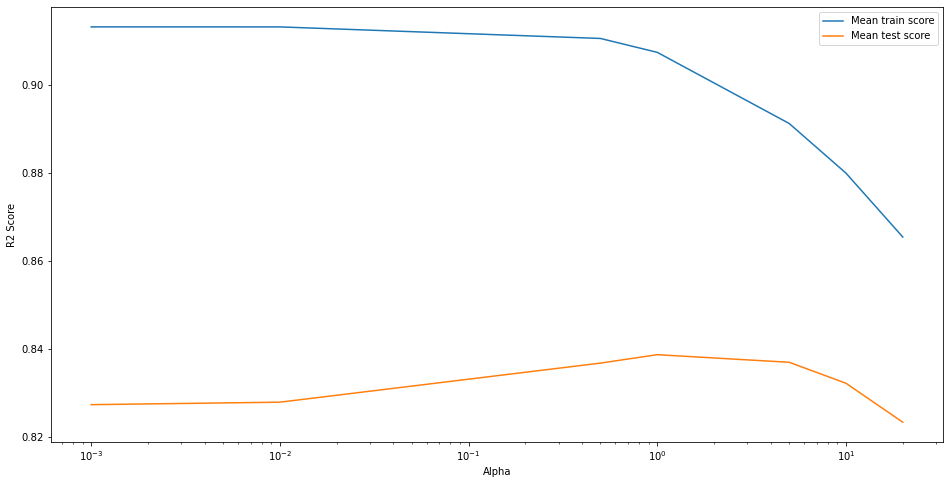

In [208]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.legend(['Mean train score', 'Mean test score'], loc='upper right')
plt.show()

In [224]:
#Building a Ridge Regression Model with alpha = 1

lm_ridge = Ridge(alpha=1)
lm_ridge.fit(X_train,y_train)

y_train_pred = lm_ridge.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred  = lm_ridge.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9057263301141527
0.8901403276040549


In [222]:
model_param = list(lm_ridge.coef_)
cols = df_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Feature','Coefficient Value']

In [223]:
ridge_coef.sort_values(by='Coefficient Value',ascending=False).head(20)

,Feature,Coefficient Value
47,MSZoning_RH,1.015491
46,MSZoning_FV,0.979857
65,Neighborhood_BrDale,0.871305
55,LandContour_Low,0.540830
37,MSSubClass_70,0.509832
36,MSSubClass_60,0.483321
61,LotConfig_Inside,0.449085
59,LotConfig_FR2,0.405096
97,Condition2_Norm,0.392640
16,HalfBath,0.360544


R2 Score for Lasso Model(Train, Test) = 0.8987864128567928, 0.9020563081888531

R2 Score for Ridge Model(Train, Test) = 0.9057263301141527, 0.9020563081888531

We can observe that the R2 scores for both Lasso and Regression model are the same. Lasso is preffered over Ridge because Lasso also helps in Feature Elimination. Hence we will build our final model using Lasso Regression

In [219]:
#Final Model using Lasso Regression Model
final_model = Lasso(alpha=0.001)
final_model.fit(X_train,y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8987864128567928
0.9020563081888531


Also to list out the top 5 features based on our analysis which would help Surprise Housing make the best decisions are - 
1. MSZoning: Identifies the general zoning classification of the sale
2. Neighborhood: Physical locations within Ames city limits
3. LandContour: Flatness of the property
4. TotalBsmtSF: Total square feet of basement area
5. MSSubClass: Identifies the type of dwelling involved in the sale.